<a href="https://colab.research.google.com/github/Diggi14/project_Property2/blob/main/outliers.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [422]:

!git clone https://github.com/Diggi14/project_Property2.git

fatal: destination path 'project_Property2' already exists and is not an empty directory.


In [423]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [424]:
pd.set_option('display.max_columns',None)
pd.set_option('display.max_rows',None)
pd.set_option('display.float_format', '{:.2f}'.format)

In [425]:
df=pd.read_csv('/content/project_Property2/Gurgaon.csv')

In [426]:
df.head(5)

,Unnamed: 0,PREFERENCE,PROPERTY_TYPE,BEDROOM_NUM,BATHROOM_NUM,BALCONY_NUM,PRICE_PER_UNIT_AREA,FURNISH,FACING,AGE,FLOOR_NUM,TOTAL_FLOOR,SUPERBUILTUP_SQFT,PRICE,PROP_HEADING,LOCALITY_WO_CITY
0,0,S,Residential Apartment,4.00,4,4.00,8766.00,Semi-furnished,North,5-10,14.00,26.00,3434 sq.ft.,2.63 Cr,4 BHK Flat in Sector 84 Gurgaon,Sector 84
1,1,S,Residential Apartment,4.00,4,3.00,21176.00,Semi-furnished,North,1-5,7.00,29.00,2870 sq.ft.,3.6 Cr,4 BHK Flat in Sector 81 Gurgaon,Sector 81
2,2,R,Residential Apartment,3.00,3,2.00,43.00,Furnished,West,1-5,7.00,17.00,1950 sq.ft.,"85,000",3 BHK Flat in Sector 66 Gurgaon,Sector 66
3,3,S,Residential Apartment,3.00,3,3.00,13740.00,Semi-furnished,NaN,1-5,14.00,28.00,2802 sq.ft.,3.85 Cr,3 BHK Flat in Sector 112 Gurgaon,Sector 112
4,4,R,Residential Apartment,3.00,4,4.00,17.00,Semi-furnished,North-West,1-5,12.00,27.00,2290 sq.ft.,"40,000",3 BHK Flat in Sector 104 Gurgaon,Sector 104


In [427]:
x=df[df['TOTAL_FLOOR'].isna()].index

In [428]:
df.drop(x,inplace=True)

In [429]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10519 entries, 0 to 10520
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Unnamed: 0           10519 non-null  int64  
 1   PREFERENCE           10519 non-null  object 
 2   PROPERTY_TYPE        10519 non-null  object 
 3   BEDROOM_NUM          10515 non-null  float64
 4   BATHROOM_NUM         10519 non-null  int64  
 5   BALCONY_NUM          10499 non-null  float64
 6   PRICE_PER_UNIT_AREA  10519 non-null  float64
 7   FURNISH              10197 non-null  object 
 8   FACING               9344 non-null   object 
 9   AGE                  10517 non-null  object 
 10  FLOOR_NUM            10519 non-null  float64
 11  TOTAL_FLOOR          10519 non-null  float64
 12  SUPERBUILTUP_SQFT    10519 non-null  object 
 13  PRICE                10519 non-null  object 
 14  PROP_HEADING         10519 non-null  object 
 15  LOCALITY_WO_CITY     10519 non-null  obje

In [430]:
df.drop(['Unnamed: 0','FACING'],axis=1,inplace=True)

In [431]:
df.head(3)

,PREFERENCE,PROPERTY_TYPE,BEDROOM_NUM,BATHROOM_NUM,BALCONY_NUM,PRICE_PER_UNIT_AREA,FURNISH,AGE,FLOOR_NUM,TOTAL_FLOOR,SUPERBUILTUP_SQFT,PRICE,PROP_HEADING,LOCALITY_WO_CITY
0,S,Residential Apartment,4.00,4,4.00,8766.00,Semi-furnished,5-10,14.00,26.00,3434 sq.ft.,2.63 Cr,4 BHK Flat in Sector 84 Gurgaon,Sector 84
1,S,Residential Apartment,4.00,4,3.00,21176.00,Semi-furnished,1-5,7.00,29.00,2870 sq.ft.,3.6 Cr,4 BHK Flat in Sector 81 Gurgaon,Sector 81
2,R,Residential Apartment,3.00,3,2.00,43.00,Furnished,1-5,7.00,17.00,1950 sq.ft.,"85,000",3 BHK Flat in Sector 66 Gurgaon,Sector 66


In [432]:
from sklearn.impute import KNNImputer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import GridSearchCV

In [433]:
ind=df[df['PRICE']=='Price on Request'].index
df.drop(ind,inplace=True)

In [434]:
import re

def clean_price(x):
    x = str(x).lower().replace(',', '').strip()

    # Handle range values
    if '-' in x:
        nums = [float(n) for n in re.findall(r'\d+\.?\d*', x)]
        x = sum(nums) / len(nums)  # average
        return x

    # Handle crore
    if 'cr' in x:
        return float(re.findall(r'\d+\.?\d*', x)[0])

    # Handle lakh
    if 'l' in x:
        return float(re.findall(r'\d+\.?\d*', x)[0]) / 100

    # Normal number
    return float(x)
df['PRICE'] = df['PRICE'].apply(clean_price)

In [435]:
'''pipeline = Pipeline([
    ('imputer', KNNImputer()),
    ('model', LinearRegression())
])

param_grid = {
    'imputer__n_neighbors': [2, 3, 5, 7, 10]
}
grid = GridSearchCV(pipeline, param_grid, cv=5)
grid.fit(X, y)

print("Best n_neighbors:", grid.best_params_) '''

'pipeline = Pipeline([\n    (\'imputer\', KNNImputer()),\n    (\'model\', LinearRegression())\n])\n\nparam_grid = {\n    \'imputer__n_neighbors\': [2, 3, 5, 7, 10]\n}\ngrid = GridSearchCV(pipeline, param_grid, cv=5)\ngrid.fit(X, y)\n\nprint("Best n_neighbors:", grid.best_params_) '

In [436]:
df['SUPERBUILTUP_SQFT']=df['SUPERBUILTUP_SQFT'].str.replace('sq.ft.','').str.strip()

In [437]:
ind = df[df['SUPERBUILTUP_SQFT'].str.contains('-')].index
df.loc[ind, 'SUPERBUILTUP_SQFT'] = (
    df.loc[ind, 'SUPERBUILTUP_SQFT']
      .str.split('-')
      .apply(lambda x: (float(x[0]) + float(x[1])) / 2)
)


In [438]:
df['SUPERBUILTUP_SQFT']=df['SUPERBUILTUP_SQFT'].astype(float)

In [439]:
df.describe()

,BEDROOM_NUM,BATHROOM_NUM,BALCONY_NUM,PRICE_PER_UNIT_AREA,FLOOR_NUM,TOTAL_FLOOR,SUPERBUILTUP_SQFT,PRICE
count,10494.00,10498.00,10478.00,10498.00,10498.00,10498.00,10498.00,10498.00
mean,3.32,3.54,2.93,31296.09,6.85,14.97,2689.49,2212.18
std,1.28,1.45,0.92,90240.00,6.32,11.35,13428.32,11392.20
min,1.00,0.00,0.00,0.00,-1.00,0.00,30.00,0.01
25%,3.00,3.00,2.00,8343.25,2.00,4.00,1575.00,1.52
50%,3.00,3.00,3.00,11813.00,5.00,14.00,2072.00,2.35
75%,4.00,4.00,4.00,17206.75,10.00,22.00,2704.00,4.10
max,22.00,22.00,4.00,6333333.00,48.00,51.00,577946.00,99000.00


<Axes: xlabel='PRICE', ylabel='Count'>

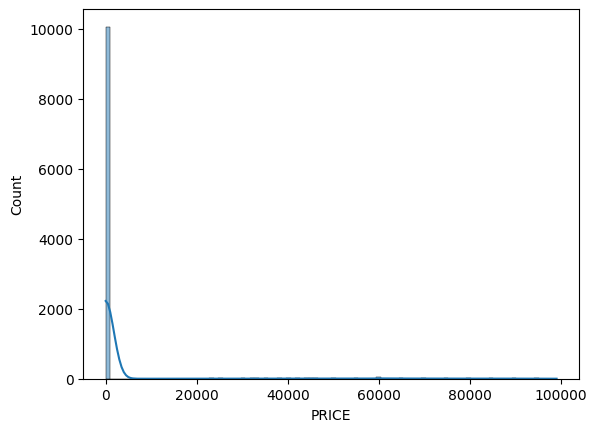

In [440]:
sns.histplot(df['PRICE'],bins=100,kde=True)

<Axes: xlabel='SUPERBUILTUP_SQFT', ylabel='Count'>

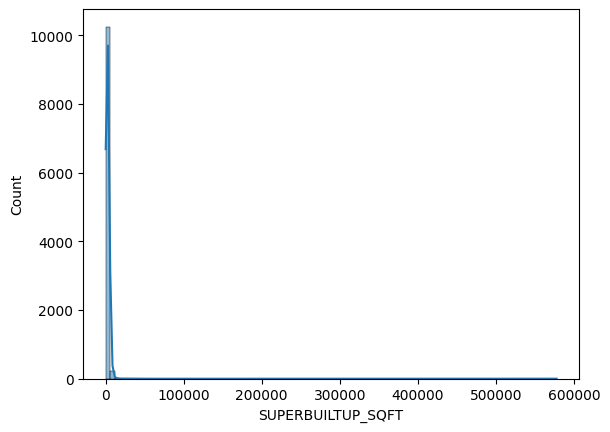

In [441]:
sns.histplot(df['SUPERBUILTUP_SQFT'],bins=100,kde=True)

<Axes: xlabel='PRICE_PER_UNIT_AREA', ylabel='Count'>

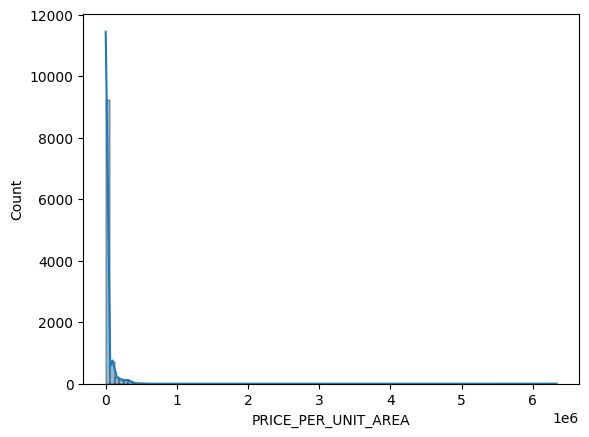

In [442]:
sns.histplot(df['PRICE_PER_UNIT_AREA'],bins=100,kde=True)

<Axes: xlabel='PRICE'>

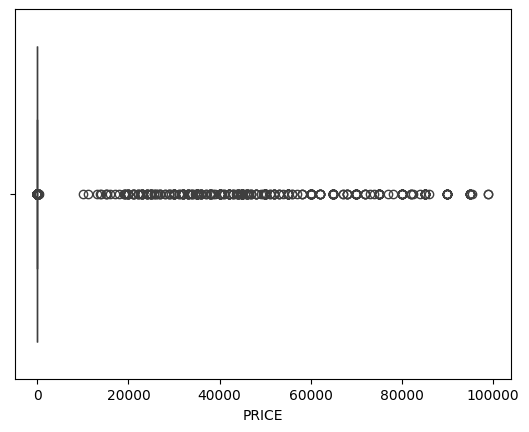

In [443]:
sns.boxplot(x=df['PRICE'])

<Axes: xlabel='PRICE_PER_UNIT_AREA'>

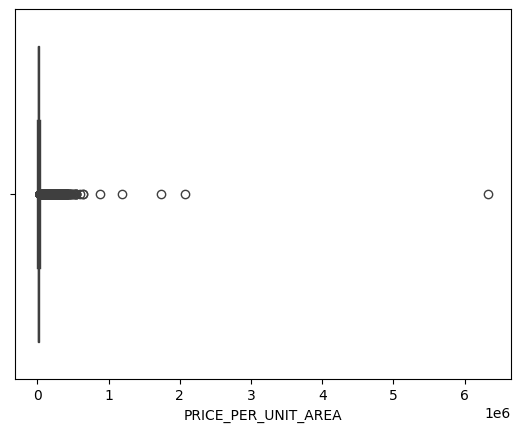

In [444]:
sns.boxplot(x=df['PRICE_PER_UNIT_AREA'])

<Axes: xlabel='SUPERBUILTUP_SQFT'>

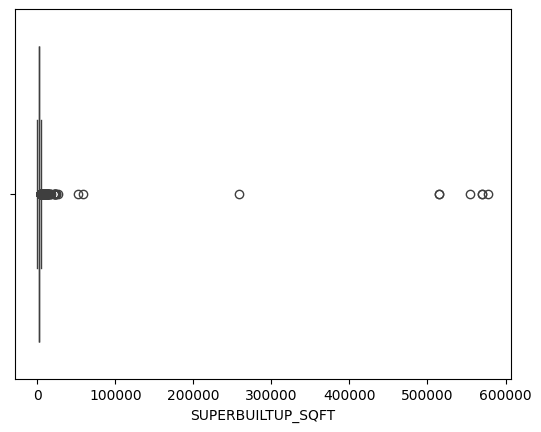

In [445]:
sns.boxplot(x=df['SUPERBUILTUP_SQFT'])

In [446]:
ind=df[df['PRICE']>1000].index
x=df.loc[ind,'PRICE_PER_UNIT_AREA']
df.loc[ind,'PRICE_PER_UNIT_AREA']=df.loc[ind,'PRICE']
df.loc[ind,'PRICE']=x

<Axes: xlabel='PRICE'>

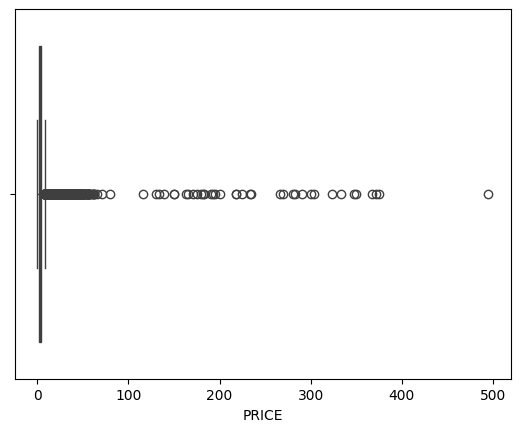

In [447]:
sns.boxplot(x=df['PRICE'])

In [448]:
ind=df[df['PRICE_PER_UNIT_AREA']>100000].index
df.loc[ind,'PRICE_PER_UNIT_AREA']=(df.loc[ind,'PRICE']*10000000)/df.loc[ind,'SUPERBUILTUP_SQFT']

In [449]:
ind=df[(df['SUPERBUILTUP_SQFT']<500) & (df['BEDROOM_NUM']>2)].index
df.loc[ind,'SUPERBUILTUP_SQFT']=df.loc[ind,'SUPERBUILTUP_SQFT']*9
df.loc[ind,'PRICE_PER_UNIT_AREA']=(df.loc[ind,'PRICE']*10000000)/df.loc[ind,'SUPERBUILTUP_SQFT']

<Axes: xlabel='PRICE_PER_UNIT_AREA'>

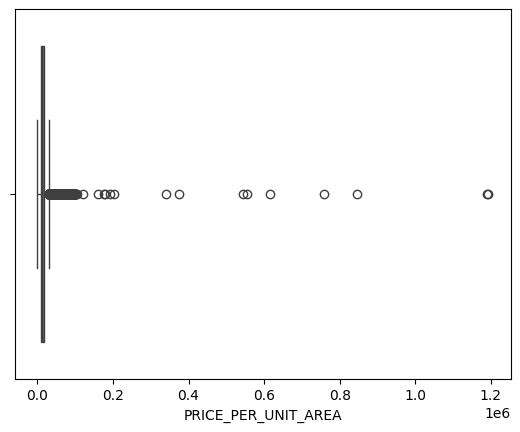

In [450]:
sns.boxplot(x=df['PRICE_PER_UNIT_AREA'])

In [451]:
ind=df[df['SUPERBUILTUP_SQFT']>50000].index
df.drop(ind,inplace=True)

<Axes: xlabel='SUPERBUILTUP_SQFT'>

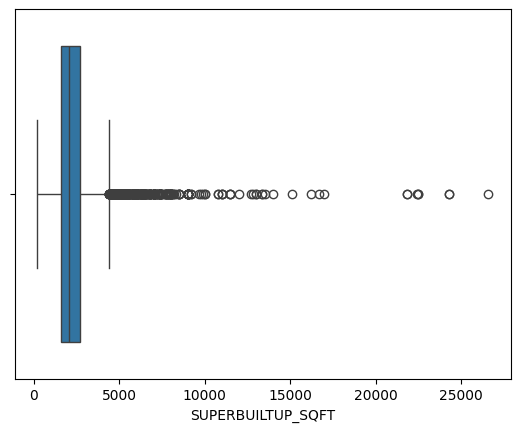

In [452]:
sns.boxplot(x=df['SUPERBUILTUP_SQFT'])

In [453]:
df['SUPERBUILTUP_SQFT'].quantile(0.05)

np.float64(925.0)

In [454]:
ind=df[df['PRICE']>100].index
df.loc[ind,'PRICE']=(df.loc[ind,'PRICE_PER_UNIT_AREA']*df.loc[ind,'SUPERBUILTUP_SQFT'])/10000000

In [455]:
ind=df[df['PRICE']>100].index

In [456]:
df.drop(ind,inplace=True)

<Axes: xlabel='PRICE'>

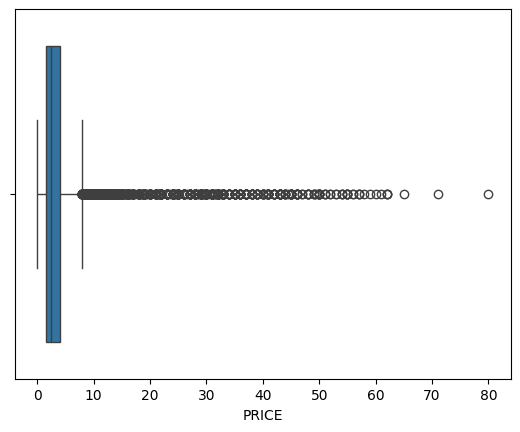

In [457]:
sns.boxplot(x=df['PRICE'])

In [458]:
ind=df[(df['PRICE_PER_UNIT_AREA']>100000) & (df['SUPERBUILTUP_SQFT']>1000)].index
df.drop(ind,inplace=True)

In [459]:
ind=df[(df['PRICE_PER_UNIT_AREA']>100000) & (df['PROPERTY_TYPE']=='Independent/Builder Floor')].index
df.loc[ind,'SUPERBUILTUP_SQFT']=df.loc[ind,'SUPERBUILTUP_SQFT']*9
df.loc[ind,'PRICE_PER_UNIT_AREA']=(df.loc[ind,'PRICE']*10000000)/df.loc[ind,'SUPERBUILTUP_SQFT']

In [460]:
ind=df[(df['PRICE_PER_UNIT_AREA']>100000)].index
df.drop(ind,inplace=True)

In [461]:
ind=df[(df['SUPERBUILTUP_SQFT']<500) & (df['BEDROOM_NUM']>1)].index
df.drop(ind,inplace=True)

In [462]:
df[(df['SUPERBUILTUP_SQFT']<500)]

,PREFERENCE,PROPERTY_TYPE,BEDROOM_NUM,BATHROOM_NUM,BALCONY_NUM,PRICE_PER_UNIT_AREA,FURNISH,AGE,FLOOR_NUM,TOTAL_FLOOR,SUPERBUILTUP_SQFT,PRICE,PROP_HEADING,LOCALITY_WO_CITY
310,S,Residential Apartment,1.00,1,1.00,6128.00,Unfurnished,1-5,7.00,10.00,359.00,0.22,1 BHK Flat in Sector-33 Sohna,Sector-33 Sohna
316,S,Residential Apartment,1.00,1,1.00,6432.00,Unfurnished,1-5,7.00,10.00,342.00,0.22,1 BHK Flat in Sector-33 Sohna,Sector-33 Sohna
641,R,Independent/Builder Floor,1.00,1,1.00,28000.00,Furnished,1-5,1.00,4.00,450.00,62.00,1 BHK Independent Builder Floor in Sushant Lok...,Sushant Lok Phase 1
685,S,Residential Apartment,1.00,1,2.00,5428.00,Unfurnished,1-5,2.00,14.00,350.00,0.19,1 BHK Flat in Sector 107 Gurgaon,Sector 107
1087,R,Residential Apartment,1.00,1,1.00,10000.00,Semi-furnished,5-10,3.00,5.00,220.00,45.00,1 BHK Flat in Sector 67 Gurgaon,Sector 67
1351,S,Residential Apartment,1.00,1,1.00,6497.00,Unfurnished,1-5,5.00,10.00,354.00,0.23,1 BHK Flat in Sohna,Sohna
1779,S,Residential Apartment,1.00,1,2.00,6493.00,Unfurnished,5-10,7.00,14.00,308.00,0.20,1 BHK Flat in Sector 107 Gurgaon,Sector 107
2087,S,Residential Apartment,1.00,2,1.00,6767.00,Unfurnished,1-5,6.00,14.00,362.00,0.24,1 BHK Flat in Sector 102 Gurgaon,Sector 102
2914,S,Residential Apartment,1.00,1,1.00,12857.00,Semi-furnished,5-10,13.00,16.00,350.00,0.45,1 BHK Flat in Sector 92 Gurgaon,Sector 92
3251,S,Independent/Builder Floor,1.00,1,1.00,32000.00,Semi-furnished,1-5,2.00,4.00,450.00,0.16,1 BHK Independent Builder Floor in New Palam V...,New Palam Vihar


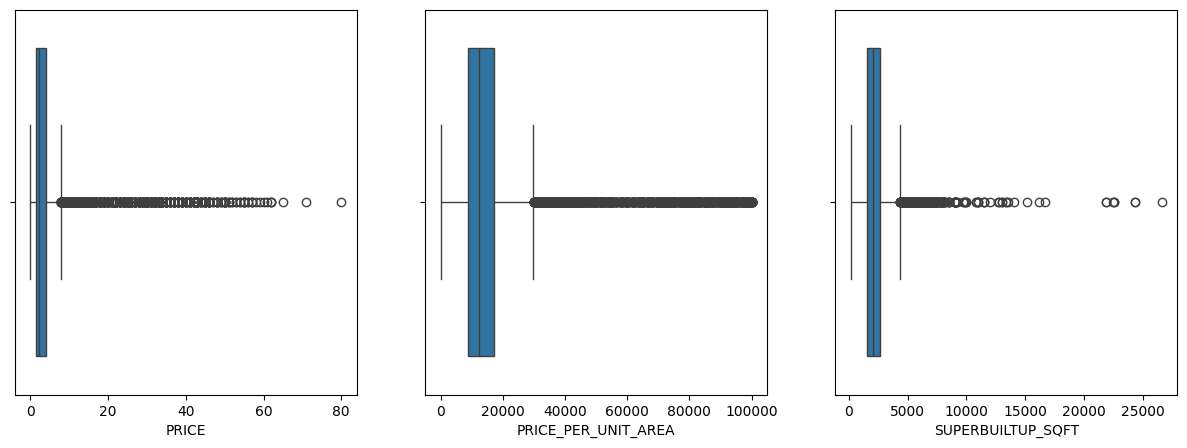

In [463]:
import matplotlib.pyplot as plt
plt.figure(figsize=(15,5))
plt.subplot(1, 3, 1)
sns.boxplot(x=df['PRICE'])

plt.subplot(1, 3, 2)
sns.boxplot(x=df['PRICE_PER_UNIT_AREA'])


plt.subplot(1, 3, 3)
sns.boxplot(x=df['SUPERBUILTUP_SQFT'])
plt.show()

In [464]:
ind=df[df['PRICE']>10].index
df.loc[ind,'PRICE']=(df.loc[ind,'PRICE_PER_UNIT_AREA']*df.loc[ind,'SUPERBUILTUP_SQFT'])/10000000

<Axes: xlabel='PRICE'>

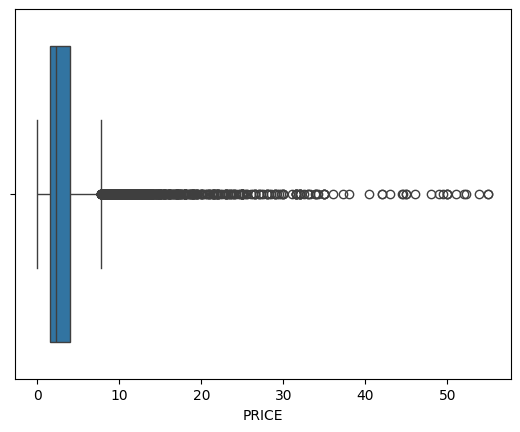

In [465]:
sns.boxplot(x=df['PRICE'])

In [466]:
ind=df[df['PRICE_PER_UNIT_AREA']>35000].index
df.loc[ind,'PRICE_PER_UNIT_AREA']=(df.loc[ind,'PRICE']*10000000)/df.loc[ind,'SUPERBUILTUP_SQFT']


<Axes: xlabel='PRICE_PER_UNIT_AREA'>

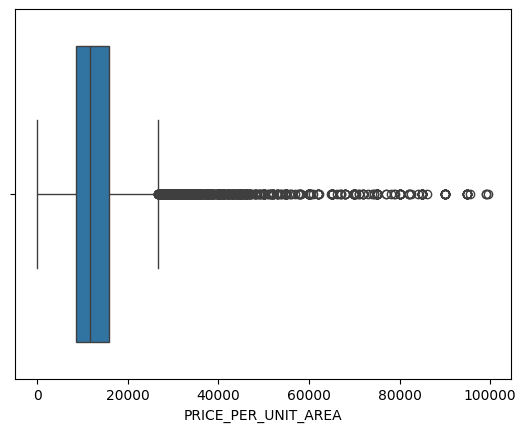

In [467]:
sns.boxplot(x=df['PRICE_PER_UNIT_AREA'])

In [468]:
ind=df[(df['SUPERBUILTUP_SQFT']<1000) & (df['BEDROOM_NUM']>2) &  ((df['PROPERTY_TYPE']=='Residential Apartment') | (df['PROPERTY_TYPE']=='Independent/Builder Floor'))].index
df.drop(ind,inplace=True)

In [469]:
df['PROPERTY_TYPE'].unique()

array(['Residential Apartment', 'Independent/Builder Floor',
       'Independent House/Villa'], dtype=object)

In [470]:
ind=df[(df['PROPERTY_TYPE']=='Independent House/Villa') & (df['FLOOR_NUM']>4)].index
df.loc[ind,'PROPERTY_TYPE']='Independent/Builder Floor'

In [471]:
df[(df['PROPERTY_TYPE']=='Independent House/Villa')]

,PREFERENCE,PROPERTY_TYPE,BEDROOM_NUM,BATHROOM_NUM,BALCONY_NUM,PRICE_PER_UNIT_AREA,FURNISH,AGE,FLOOR_NUM,TOTAL_FLOOR,SUPERBUILTUP_SQFT,PRICE,PROP_HEADING,LOCALITY_WO_CITY
29,S,Independent House/Villa,3.00,3,3.00,9771.00,Semi-furnished,Under Construction,4.00,4.00,1535.00,1.50,3 Bedroom House in Sector 37D Gurgaon,Sector 37D
30,S,Independent House/Villa,4.00,3,2.00,36000.00,Semi-furnished,0-1,1.00,1.00,5000.00,18.00,4 Bedroom House in South City 1,South City 1
89,S,Independent House/Villa,7.00,7,4.00,32407.41,Unfurnished,10+,4.00,4.00,1080.00,3.50,7 Bedroom House in DLF Phase 3,DLF Phase 3
115,R,Independent House/Villa,8.00,9,4.00,930.00,Furnished,5-10,3.00,3.00,1935.00,0.02,"8 Bedroom House in Block C, Sushant Lok Phase 1","Block C, Sushant Lok Phase 1"
139,S,Independent House/Villa,4.00,5,4.00,24691.36,Semi-furnished,0-1,2.00,2.00,3240.00,8.00,4 Bedroom House in Sector 48 Gurgaon,Sector 48
140,S,Independent House/Villa,4.00,4,2.00,33024.69,Semi-furnished,5-10,2.00,2.00,3240.00,10.70,4 Bedroom House in Nirvana Country,Nirvana Country
156,R,Independent House/Villa,3.00,3,2.00,65000.00,Semi-furnished,0-1,3.00,3.00,2493.00,16.20,3 Bedroom House in Sushant Lok Phase 1,Sushant Lok Phase 1
166,R,Independent House/Villa,5.00,5,4.00,60.00,Semi-furnished,5-10,2.00,2.00,3200.00,0.01,5 Bedroom House in Nirvana Country,Nirvana Country
170,S,Independent House/Villa,3.00,2,2.00,11304.00,Semi-furnished,10+,3.00,3.00,1150.00,1.30,3 Bedroom House in Sector 50 Gurgaon,Sector 50
172,R,Independent House/Villa,4.00,5,4.00,444.00,Semi-furnished,5-10,3.00,3.00,3240.00,0.02,4 Bedroom House in Sector 48 Gurgaon,Sector 48


In [472]:
df['stories'] = np.where(
    (df['PROPERTY_TYPE'] == 'Independent House/Villa') & (df['FLOOR_NUM'] != 1),
    'multi',
    'single'
)


In [473]:
df[(df['PROPERTY_TYPE']=='Independent House/Villa')]

,PREFERENCE,PROPERTY_TYPE,BEDROOM_NUM,BATHROOM_NUM,BALCONY_NUM,PRICE_PER_UNIT_AREA,FURNISH,AGE,FLOOR_NUM,TOTAL_FLOOR,SUPERBUILTUP_SQFT,PRICE,PROP_HEADING,LOCALITY_WO_CITY,stories
29,S,Independent House/Villa,3.00,3,3.00,9771.00,Semi-furnished,Under Construction,4.00,4.00,1535.00,1.50,3 Bedroom House in Sector 37D Gurgaon,Sector 37D,multi
30,S,Independent House/Villa,4.00,3,2.00,36000.00,Semi-furnished,0-1,1.00,1.00,5000.00,18.00,4 Bedroom House in South City 1,South City 1,single
89,S,Independent House/Villa,7.00,7,4.00,32407.41,Unfurnished,10+,4.00,4.00,1080.00,3.50,7 Bedroom House in DLF Phase 3,DLF Phase 3,multi
115,R,Independent House/Villa,8.00,9,4.00,930.00,Furnished,5-10,3.00,3.00,1935.00,0.02,"8 Bedroom House in Block C, Sushant Lok Phase 1","Block C, Sushant Lok Phase 1",multi
139,S,Independent House/Villa,4.00,5,4.00,24691.36,Semi-furnished,0-1,2.00,2.00,3240.00,8.00,4 Bedroom House in Sector 48 Gurgaon,Sector 48,multi
140,S,Independent House/Villa,4.00,4,2.00,33024.69,Semi-furnished,5-10,2.00,2.00,3240.00,10.70,4 Bedroom House in Nirvana Country,Nirvana Country,multi
156,R,Independent House/Villa,3.00,3,2.00,65000.00,Semi-furnished,0-1,3.00,3.00,2493.00,16.20,3 Bedroom House in Sushant Lok Phase 1,Sushant Lok Phase 1,multi
166,R,Independent House/Villa,5.00,5,4.00,60.00,Semi-furnished,5-10,2.00,2.00,3200.00,0.01,5 Bedroom House in Nirvana Country,Nirvana Country,multi
170,S,Independent House/Villa,3.00,2,2.00,11304.00,Semi-furnished,10+,3.00,3.00,1150.00,1.30,3 Bedroom House in Sector 50 Gurgaon,Sector 50,multi
172,R,Independent House/Villa,4.00,5,4.00,444.00,Semi-furnished,5-10,3.00,3.00,3240.00,0.02,4 Bedroom House in Sector 48 Gurgaon,Sector 48,multi


In [474]:
df['PRICE_PER_UNIT_AREA'].isna().sum()

np.int64(0)

In [475]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10411 entries, 0 to 10520
Data columns (total 15 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   PREFERENCE           10411 non-null  object 
 1   PROPERTY_TYPE        10411 non-null  object 
 2   BEDROOM_NUM          10407 non-null  float64
 3   BATHROOM_NUM         10411 non-null  int64  
 4   BALCONY_NUM          10391 non-null  float64
 5   PRICE_PER_UNIT_AREA  10411 non-null  float64
 6   FURNISH              10092 non-null  object 
 7   AGE                  10409 non-null  object 
 8   FLOOR_NUM            10411 non-null  float64
 9   TOTAL_FLOOR          10411 non-null  float64
 10  SUPERBUILTUP_SQFT    10411 non-null  float64
 11  PRICE                10411 non-null  float64
 12  PROP_HEADING         10411 non-null  object 
 13  LOCALITY_WO_CITY     10411 non-null  object 
 14  stories              10411 non-null  object 
dtypes: float64(7), int64(1), object(7)
memory

In [476]:
ind=df[df['BEDROOM_NUM']>10].index
df.drop(ind,inplace=True)

In [477]:
df.drop(df[df['BATHROOM_NUM']>10].index,inplace=True)

In [478]:
Q1=df['PRICE_PER_UNIT_AREA'].quantile(0.25)
Q3=df['PRICE_PER_UNIT_AREA'].quantile(0.75)
lower_bound=Q1-1.5*(Q3-Q1)
upper_bound=Q3+1.5*(Q3-Q1)
outlier_sqft=df[(df['PRICE_PER_UNIT_AREA']>upper_bound)]
outlier_sqft['PRICE_PER_UNIT_AREA'].describe()

,PRICE_PER_UNIT_AREA
count,854.00
mean,45440.66
std,17594.90
min,26451.00
25%,32222.06
50%,38130.50
75%,55000.00
max,99000.00


In [479]:
outlier_sqft['x']=(outlier_sqft['PRICE']*10000000)/outlier_sqft['SUPERBUILTUP_SQFT']
ind=outlier_sqft[(outlier_sqft['x'] < outlier_sqft['PRICE_PER_UNIT_AREA'])].index
df.loc[ind,'PRICE_PER_UNIT_AREA']=outlier_sqft.loc[ind,'x']

/tmp/ipython-input-1462660466.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outlier_sqft['x']=(outlier_sqft['PRICE']*10000000)/outlier_sqft['SUPERBUILTUP_SQFT']


In [484]:
df.drop(df[df['PRICE_PER_UNIT_AREA']>32000].index,inplace=True)

In [486]:
df.drop(df[df['SUPERBUILTUP_SQFT']>9000].index,inplace=True)

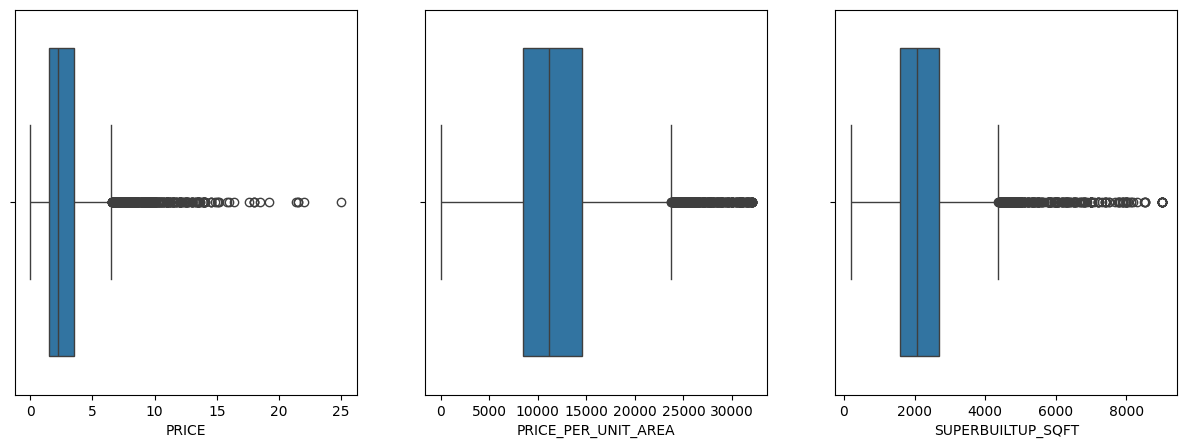

In [487]:
import matplotlib.pyplot as plt
plt.figure(figsize=(15,5))
plt.subplot(1, 3, 1)
sns.boxplot(x=df['PRICE'])

plt.subplot(1, 3, 2)
sns.boxplot(x=df['PRICE_PER_UNIT_AREA'])


plt.subplot(1, 3, 3)
sns.boxplot(x=df['SUPERBUILTUP_SQFT'])
plt.show()

<Axes: xlabel='PRICE', ylabel='PRICE_PER_UNIT_AREA'>

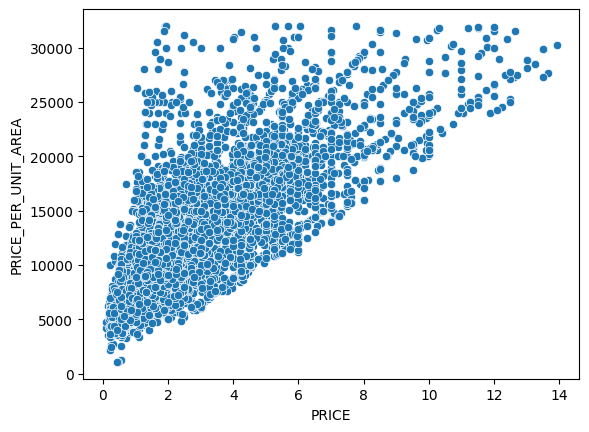

In [505]:
sns.scatterplot(x=df['PRICE'],y=df['PRICE_PER_UNIT_AREA'])

<Axes: xlabel='PRICE', ylabel='SUPERBUILTUP_SQFT'>

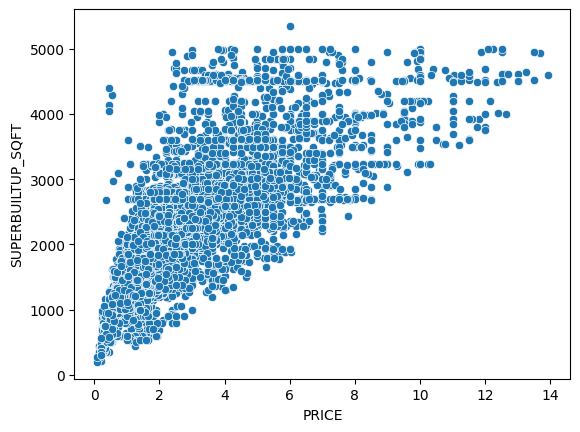

In [506]:
sns.scatterplot(x=df['PRICE'],y=df['SUPERBUILTUP_SQFT'])

In [493]:
df.drop(df[df['PRICE_PER_UNIT_AREA']<1000].index,inplace=True)

In [494]:
df[(df['PRICE']<1) & (df['SUPERBUILTUP_SQFT']>2000)]

,PREFERENCE,PROPERTY_TYPE,BEDROOM_NUM,BATHROOM_NUM,BALCONY_NUM,PRICE_PER_UNIT_AREA,FURNISH,AGE,FLOOR_NUM,TOTAL_FLOOR,SUPERBUILTUP_SQFT,PRICE,PROP_HEADING,LOCALITY_WO_CITY,stories
854,S,Residential Apartment,2.00,2,2.00,7277.00,Semi-furnished,Under Construction,2.00,14.00,7986.00,0.54,2 BHK Flat in Sector 76 Gurgaon,Sector 76,single
1175,S,Residential Apartment,3.00,3,3.00,4051.00,Semi-furnished,0-1,4.00,7.00,2024.00,0.82,3 BHK Flat in Sector 1 Imt Manesar,Sector 1 Imt Manesar,single
2185,S,Independent House/Villa,4.00,2,1.00,1304.45,Semi-furnished,1-5,2.00,2.00,4293.00,0.56,4 Bedroom House in Subhash Nagar,Subhash Nagar,multi
2611,S,Independent House/Villa,3.00,3,2.00,1089.32,Semi-furnished,1-5,2.00,2.00,4131.00,0.45,3 Bedroom House in Surat Nagar 1,Surat Nagar 1,multi
2993,S,Residential Apartment,3.00,3,2.00,3585.00,Unfurnished,5-10,3.00,8.00,2050.00,0.73,3 BHK Flat in Sector 1 Imt Manesar,Sector 1 Imt Manesar,single
3033,S,Residential Apartment,3.00,3,4.00,2511.00,Semi-furnished,1-5,18.00,40.00,2979.00,0.56,3 BHK Flat in Sector 65 Gurgaon,Sector 65,single
3113,S,Residential Apartment,4.00,3,3.00,3317.00,Semi-furnished,10+,8.00,16.00,3100.00,0.72,4 BHK Flat in Sector 92 Gurgaon,Sector 92,single
3257,S,Independent House/Villa,3.00,3,2.00,1086.42,Semi-furnished,1-5,2.00,2.00,4050.00,0.44,3 Bedroom House in Surat Nagar 1,Surat Nagar 1,multi
3968,S,Residential Apartment,2.00,2,2.00,6642.00,Semi-furnished,Under Construction,8.00,19.00,6684.00,0.41,2 BHK Flat in Sector 88A Gurgaon,Sector 88A,single
4568,S,Independent/Builder Floor,3.00,3,2.00,3796.30,Unfurnished,0-1,1.00,2.00,2160.00,0.82,3 BHK Independent Builder Floor in Sector 82 G...,Sector 82,single


In [499]:
ind=df[(df['BEDROOM_NUM']<=5) & (df['SUPERBUILTUP_SQFT']>5000)].index
df.drop(ind,inplace=True)

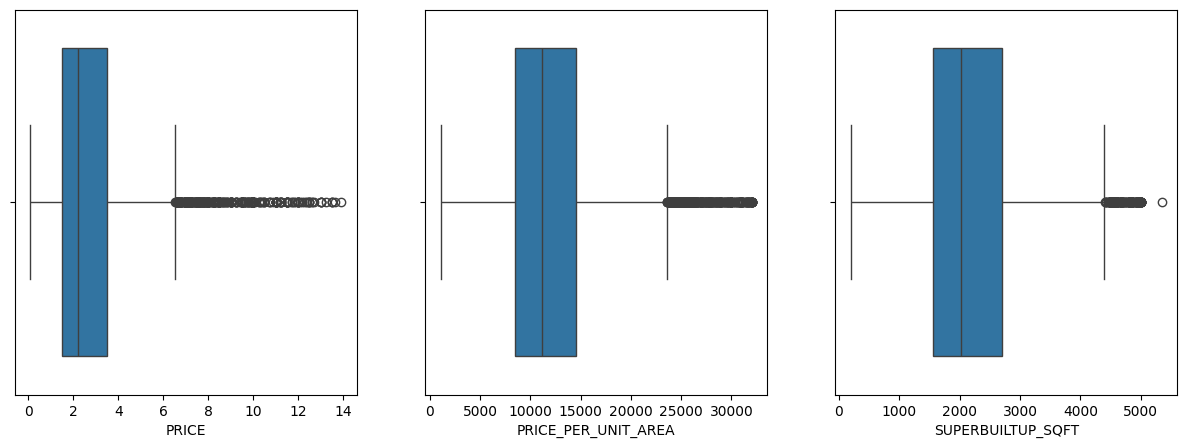

In [504]:
import matplotlib.pyplot as plt
plt.figure(figsize=(15,5))
plt.subplot(1, 3, 1)
sns.boxplot(x=df['PRICE'])

plt.subplot(1, 3, 2)
sns.boxplot(x=df['PRICE_PER_UNIT_AREA'])


plt.subplot(1, 3, 3)
sns.boxplot(x=df['SUPERBUILTUP_SQFT'])
plt.show()

In [503]:
df.drop(df[df['SUPERBUILTUP_SQFT']>6000].index,inplace=True)

In [508]:
df.drop('PROP_HEADING',axis=1,inplace=True)

In [509]:
df.describe()

,BEDROOM_NUM,BATHROOM_NUM,BALCONY_NUM,PRICE_PER_UNIT_AREA,FLOOR_NUM,TOTAL_FLOOR,SUPERBUILTUP_SQFT,PRICE
count,9392.00,9396.00,9382.00,9396.00,9396.00,9396.00,9396.00,9396.00
mean,3.21,3.41,2.90,12156.17,6.80,15.02,2190.31,2.71
std,0.93,1.13,0.91,5092.90,6.22,11.22,897.34,1.89
min,1.00,0.00,0.00,1086.42,-1.00,0.00,200.00,0.09
25%,3.00,3.00,2.00,8500.00,2.00,4.00,1565.00,1.50
50%,3.00,3.00,3.00,11158.50,5.00,14.00,2025.00,2.20
75%,4.00,4.00,4.00,14541.00,10.00,22.00,2700.00,3.50
max,10.00,10.00,4.00,32000.00,48.00,51.00,5350.00,13.92


In [510]:
df.to_csv('gurgaon_cleaned.csv')